*@rtbins*

# Benchmark model for SPY

In [1]:
import sys
sys.path.insert(0, "../..")

import os
import warnings
warnings.filterwarnings("ignore")

from deepstocks.notebook import psource

In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import (LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler

start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2015, 1, 1)

In [3]:
def get_data(symbol):
    dates = pd.date_range(start_date, end_date)
    df = pd.DataFrame(index=dates)
    df_temp = pd.read_csv('../../data/'+symbol+'.csv',
                          index_col='Date',
                          parse_dates=True,
                          usecols=['Date', 'Adj Close'],
                          na_values=['nan'])
    df = df.join(df_temp, how='inner')
    df = df.dropna(subset=["Adj Close"])
    scalar = MinMaxScaler()
    df['Adj Close'] = scalar.fit_transform(df['Adj Close'].values.reshape(-1, 1))
    
    prices = df['Adj Close'].values
    dates = np.arange(0, len(prices))
    return dates, prices

In [4]:
def predict_price_linear(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices, (len(prices),1))
    
    x_train, x_test, y_train, y_test = train_test_split( dates, prices, 
                                        test_size=0.20, random_state=42, shuffle=False)
    
    linear_mod = linear_model.LinearRegression() # defining the linear regression model
    linear_mod.fit(x_train, y_train) # fitting the data points in the model
    
    poly_mod = make_pipeline(PolynomialFeatures(2), TheilSenRegressor(random_state=17))
    poly_mod.fit(x_train, y_train)
    
    linear_pred = linear_mod.predict(x_test)
    poly_pred = poly_mod.predict(x_test)
    
    plot = plt.figure(figsize=(12,8), dpi=300)
    plt.scatter(x_test, y_test, color= 'green', label= 'Data', alpha=0.3) # plotting the initial datapoints 
    plt.plot(x_test, linear_pred, color= 'red', label= 'Linear model') # plotting the line made by linear regression
    plt.plot(x_test, poly_pred, color= 'blue', label= 'Polynomial model') # plotting the line made by linear regression
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('SPY benchmark')
    plt.legend()
    plt.show()
    plot.savefig('../../images/benchmark/spy.png')
    return mean_squared_error(linear_pred, y_test), mean_squared_error(poly_pred, y_test)

In [5]:
dates, prices = get_data('SPY')

In [6]:
print("Dates- ", dates[0:10])
print("Prices- ", prices[0:10])

Dates-  [0 1 2 3 4 5 6 7 8 9]
Prices-  [0.07991093 0.08225644 0.08288185 0.08663473 0.08960564 0.0908566
 0.08249087 0.08999642 0.0924203  0.08233467]


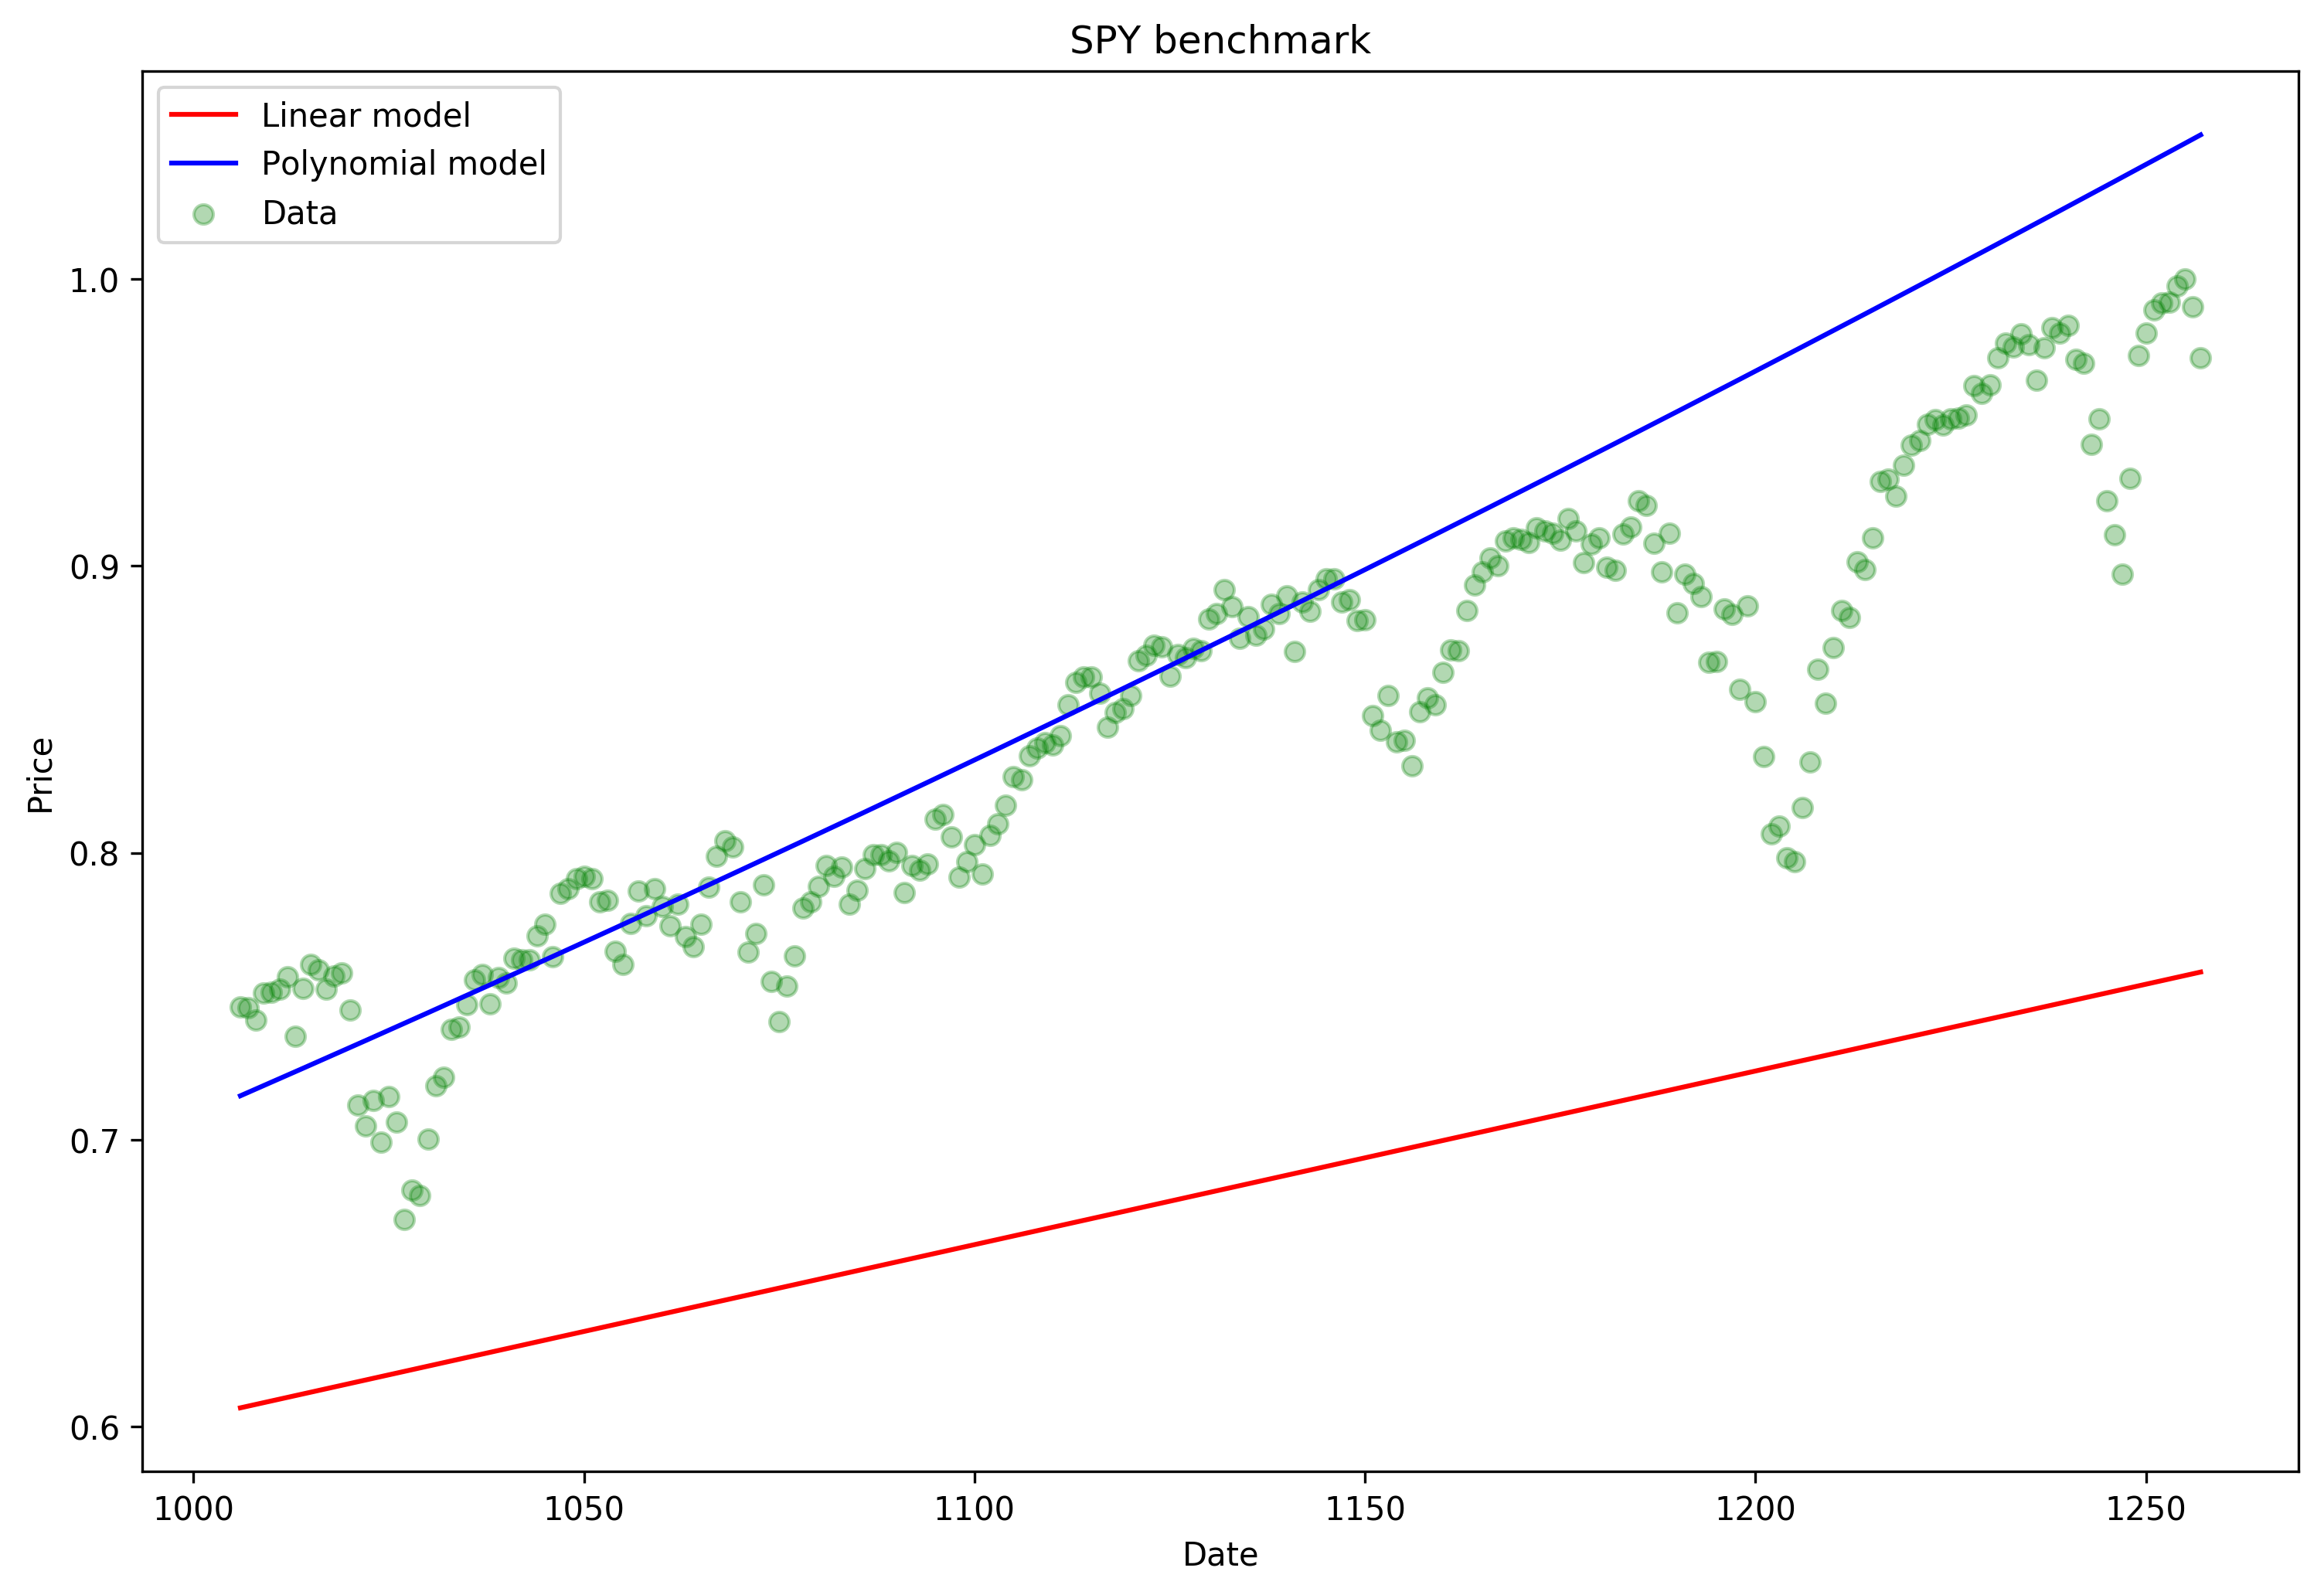

Linear model test score: (0.0285 MSE), (0.1688 RMSE)
Polynomial model test score: (0.0026 MSE), (0.0505 RMSE)


In [7]:
import math
linear_mse, poly_mse = predict_price_linear(dates, prices, 29)
print('Linear model test score: (%.4f MSE), (%.4f RMSE)'%(linear_mse, math.sqrt(linear_mse)))
print('Polynomial model test score: (%.4f MSE), (%.4f RMSE)'%(poly_mse, math.sqrt(poly_mse)))